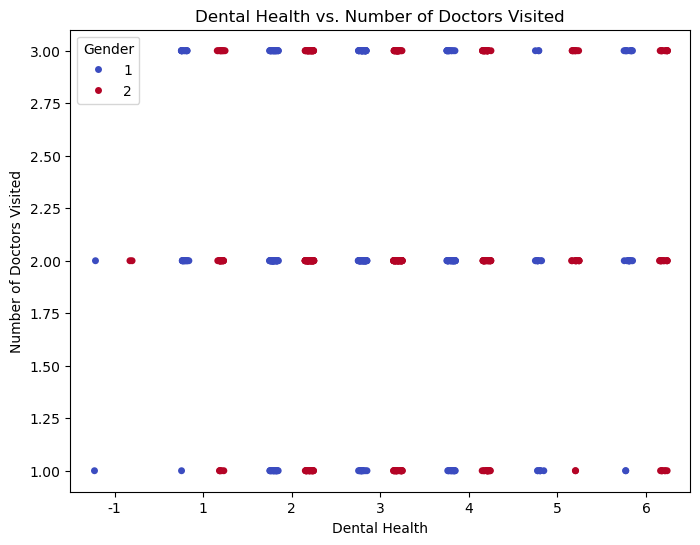

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (use the preprocessed or raw data as needed)
doc_visit = pd.read_csv('NPHA-doctor-visits.csv')

# Example: Visualizing 'Dental Health' vs. 'Number of Doctors Visited'
plt.figure(figsize=(8, 6))
sns.stripplot(data=doc_visit, 
              x='Dental Health', 
              y='Number of Doctors Visited', 
              hue='Gender', 
              dodge=True, 
              palette='coolwarm', 
              jitter=True)
plt.title('Dental Health vs. Number of Doctors Visited')
plt.xlabel('Dental Health')
plt.ylabel('Number of Doctors Visited')
plt.legend(title='Gender')
plt.show()

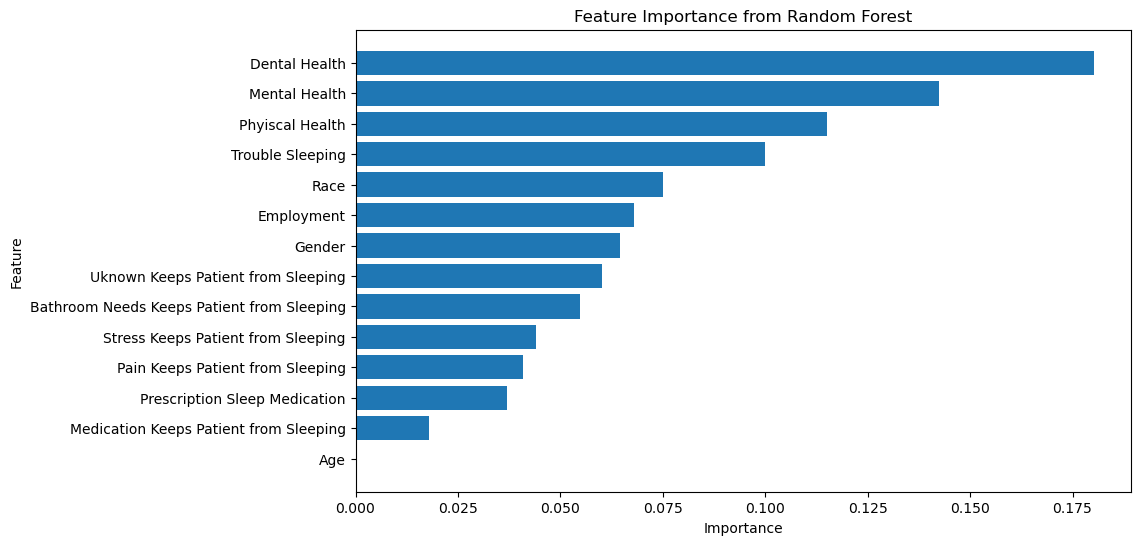

Features with low importance:
  Feature  Importance
0     Age         0.0


In [9]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = doc_visit.drop(columns=['Number of Doctors Visited'])  # Replace with your actual DataFrame
y = doc_visit['Number of Doctors Visited']

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Print features with low importance
print("Features with low importance:")
print(feature_importances[feature_importances['Importance'] < 0.01])
